                       Нижегородский  государственный  университет  им. Н.И. Лобачевского 
                                         Радиофизический  факультет 

                               Лабораторная  работа по программированию №6 
                                              
                                   Поиск безусловного экстремума функции

                                                                                       Работу  выполнил:

                                                                                       студент  радиофизического  факультета

                                                                                       430 группы 

                                                                                       Сергеев  Егор
  
                                                                                       Преподаватель: 

                                                                                       Шиндин А.В.     


                                              Нижний Новгород, 2016 


##  Поиск безусловного экстремума функции



### Градиентный метод с дроблением шага.  
Большинство процессов, используемых для приближенного решения задачи можно представить как итерационные в виде $x_{k+1} = x_k + α_kp_k$. Здесь $x_k$ начальное приближение, $x_{k+1}$ следующее, $p_k$-направление поиска, которое совпадает с направление антиградиента. Параметрами метода являются величины $α > 0$ и $λ ∈ (0, 1)$. Параметр $λ$ называется коэффициентом дробления. Значения параметров выбираются наперед; они одни и те же для всех итераций.
Выбор $α_k$ происходит следующим образом. Положив сначала $α_0 = α$, проверим неравенство $f(x_k + α_0p_k) < f(x_k) \quad *$.
Если оно выполнено, то берем $α_k = α_0$. В противном случае значение $α_0$ изменяем, домножив его на $λ$ (дробление $α_0$). Снова проверяем $(*)$. И так до тех пор, пока неравенство $(*)$ не выполнится. То значение $α_0$, при котором это произойдет впервые, и выбираем в качестве $α_k$.

## Исследование условий сходимости

Для сходимости итерационного процесса необходима непрерывность функции в окрестности точки экстремума. Как видно, функция этому условию удовлетворяет.

Сходимость метода заведомо гарантируется только при положительной определенности гессиана функции. Из критерия Сильвестра- "для того, чтобы квадратичная форма, пораждаемая данной матрицей была положительно определенной, необходимо и достаточно, чтобы все окаймляющие миноры этой матрицы были положительными". Этот критерий проверяется во время работы программы, и в случае его невыполнения, программа возвращает сообщение об ошибке.

## Оценка овражности
Найдя координаты минимума $x$ исследуемой функции, представляется возможным оценить её показатель овражности в окрестности этого минимума. По определению, под показателем овражности $θ$ функции $f(x)$ в окрестности точки минимума $x$ подразумевают отношение наибольшего собственного числа матрицы Гессе $∇^2f(x)$ к наименьшему. Чем больше этот показатель, тем более вытянутым и крутым является "овраг" поверхности уровня $f(x)$ в окрестности $x$ и тем медленнее сходятся в этой окрестности градиентные итерационные методы. 

## Задание:
Найти точку минимума функции $f(x_1,x_2)=(x_1-1)^2+2x_2^2+3$, $[x_1^0=-1, x_2^0=2]$ градиентным методом дробления шага. В окрестности точки минимума оценить овражность, построить линии уровня и траекторию поиска. Исследовать условия сходимости.


In [44]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm, inv, eig, det
def f1(x):
    return (x[0]-1)**2+2*x[1]**2+3
def grad(f, xx):
    h=0.0001
    dim=len(xx)
    g=np.array([0.]*dim)
    for i in range(dim):
        hi=np.array([0.]*dim)
        hi[i]=0.0001
        g[i]=((f(xx+hi)-f(xx-hi))/2/h)
    return g
def gess(f, xx):
    dim=len(xx)
    h=0.0001
    df=np.zeros((dim, dim))
    e=np.eye(dim)
    for j in range(0, dim):
        for k in range(0, dim):
            a=xx+(e[j]+e[k])*h
            b=xx+e[j]*h
            c=xx+e[k]*h
            l=f(a)-f(b)-f(c)+f(xx)
            df[j][k]=l/h**2
    return df
def func(f, x, e):
    kj=10000
    xk=[]
    i=1
    while kj>e:
        xk.append(x)
        u=1
        v=0
        p=-grad(f, x)
        a=1
        while u>v:
            u=f(x+a*p)
            v=f(x)
            a*=1/2
        x1=x+a*p
        kj=norm((x1-x), 1)/(norm(x1,1))
        x=x1
        i+=1
    xk.append(x1)
    return xk,i
def m1(f, ni):
    x0=[]
    eps=float(input('epsilon= '))
    print('начальная точка:')
    for j in range(ni):
        print('x0[', j+1, ']')
        x0.append(float(input()))
    hl=gess(f, x0)
    p=0
    for m in range(1,ni+1):
        hk=np.zeros((m, m))
        for n in range(m):
            for k in range(m):
                hk[n][k]=hl[n][k]
        if det(hk)>0:
            p+=1
    if p!=ni:
        print('Error!')
        return 0,0
    else:
        xm, q = func(f, x0, eps)
        xs=np.zeros((q, len(x0)))
        for l in range(q):
            for t in range(len(x0)):
                xs[l][t]=xm[l][t]
            print(repr(l).center(5), '|', xs[l])
    return q, xs 



In [45]:

qp, xt = m1(f1, 2)

epsilon= 0.001
начальная точка:
x0[ 1 ]
-1
x0[ 2 ]
2
  0   | [-1.  2.]
  1   | [ -1.10134124e-13  -2.00017780e-12]
  2   | [  5.00000000e-01   2.20268248e-13]
  3   | [  1.00000000e+00   2.20268248e-13]
  4   | [  1.00000000e+00   2.20268248e-13]


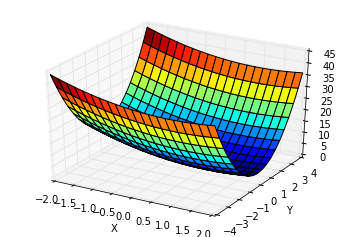

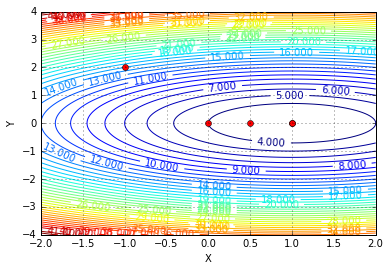

In [48]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.linspace(-2, 2, 200)
Y = np.linspace(-4, 4, 200)
X, Y = np.meshgrid(X, Y)
R=[X, Y]
Z = f1(R)
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet)
pl.xlabel('X')
pl.ylabel('Y')
plt.show()
for h in range(qp):
    pl.plot(xt[h][0], xt[h][1], 'ro')
cs = pl.contour(X, Y, Z, 40, cmap=cm.jet)
pl.clabel(cs)
pl.xlabel('X')
pl.ylabel('Y')
pl.grid(True)
pl.show()